<a href="https://colab.research.google.com/github/Bhanukoya/Deep-Learning/blob/master/Deep_learning_Bank_cusotmer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Deep Neural networks model to Bank customer churn data 

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
df=pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F66163%2F130012%2FChurn_Modelling.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592876742&Signature=ngti7QBCEjbJrxkV1JwFRp7kKAzyOQznKorkwXp4aDkEzHfmf2hoBc8JPFpgT88XJQR4Eey%2B6mFs9o1NMfsRbcHGdoAqW6slbJk25Wd4jBwhvmhWAY27D1vSTO5gbVZ%2FFbJGyzUcyd5wU7mhSwmi91GHH%2BNW14ElgEWwTwoWlmIK%2BLEWreWBs0iMyhyks3xSRJl01IwhVV8JYFzCjj7SVBoQBMQGfqqS8DcPEChnXwYStWTpECAXg3LcfgRjNSxhAOeIgJ7CfijiKpl7R%2FqkGOhI%2BwIArYQnWZ1X%2FV%2B69JvVOVvHVy4tQSYPUIA%2BQfRLkl2Vgi7YEhlDDRRWJbPGoA%3D%3D')

In [178]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Visualization

Text(0.5, 1.0, ' Pie chart of customers churned and retained')

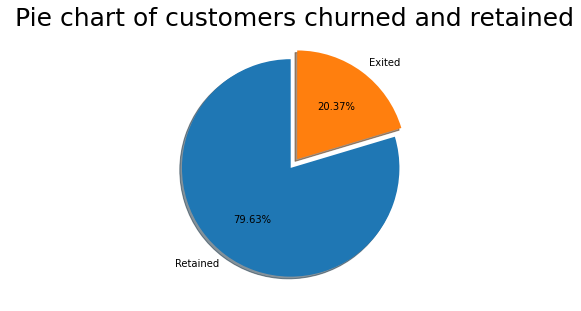

In [179]:
size = len(df[df['Exited']==0]), len(df[df['Exited']==1])

plt.subplots(figsize=(5, 5))

plt.pie(size, labels=['Retained', 'Exited'], autopct='%1.2f%%', explode=(0, 0.1),shadow=True, startangle=90)

plt.title(" Pie chart of customers churned and retained", size = 25)


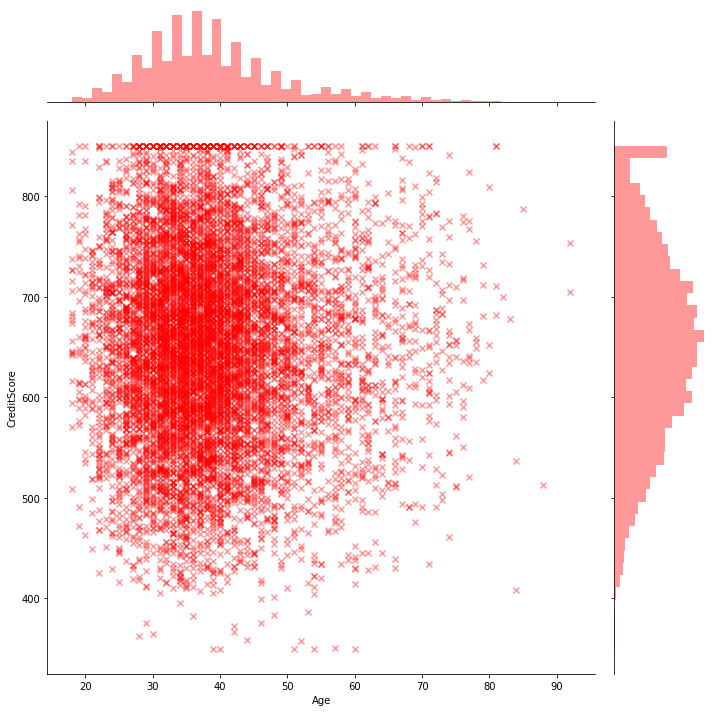

In [180]:
# To see what age of customers have good credit score
sns.jointplot(df.Age, df.CreditScore ,alpha=0.4, color='r', height=10, marker='x')


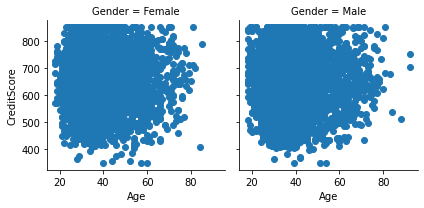

In [181]:
# To check age vs creditscore with respect to gender
c=sns.FacetGrid(df, col='Gender')
c.map(plt.scatter, 'Age', 'CreditScore')


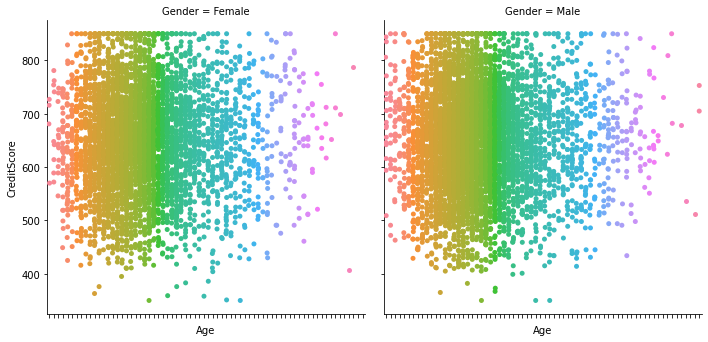

In [182]:
s=sns.catplot('Age', 'CreditScore', col='Gender', data=df)
s.set(xticklabels=[])

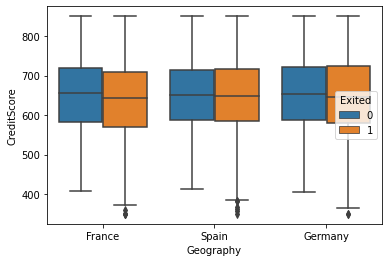

In [183]:
# Checking Creditscore of customers who exited and retained with respect to geography
sns.boxplot(x = df.Geography, y = df.CreditScore , hue='Exited', data=df)

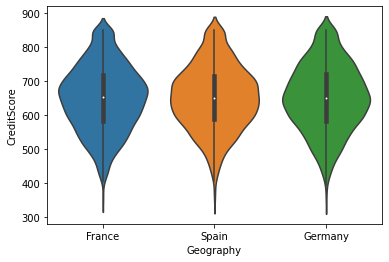

In [184]:
sns.violinplot(x = df.Geography, y = df.CreditScore)

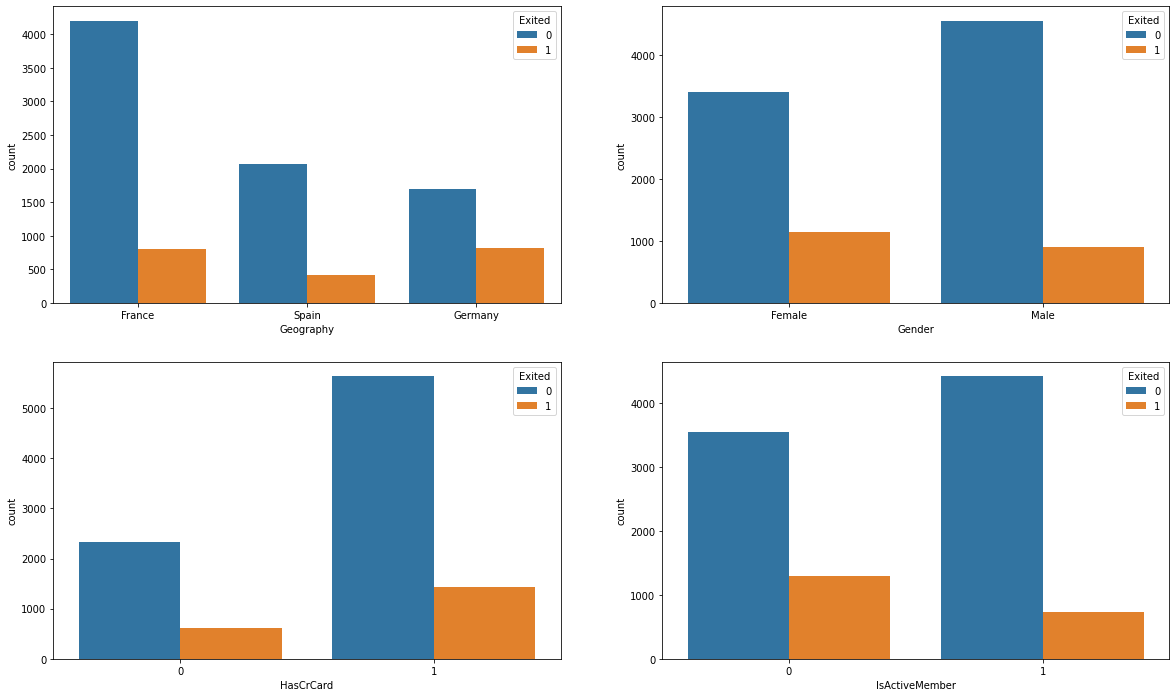

In [185]:


fig, ax =  plt.subplots(2, 2, figsize=(20, 12))


sns.countplot(x = df.Geography, hue=df.Exited, ax=ax[0][0])

sns.countplot(x = df.Gender, hue=df.Exited, ax=ax[0][1])

sns.countplot(x = df.HasCrCard, hue=df.Exited, ax=ax[1][0])

sns.countplot(x = df.IsActiveMember, hue=df.Exited, ax=ax[1][1])



1) Majority of customers are from France. But, cusotmer churning is inversely proportional to polpulation.

2) Female customers are churning more than male customers.

3) No of customers having credit card churned more than that of no of people not having credit card

4) Inactive people are churning more

In [186]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
x = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [188]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [189]:
y = df.Exited
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.Gender = le.fit_transform(x.Gender)

In [197]:
x = pd.get_dummies(x ,drop_first=True ,columns=['Geography'])

In [198]:
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,0


In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
ss= StandardScaler()

In [201]:
x = ss.fit_transform(x)

In [206]:
x[0:5]

array([[-0.32622142, -1.09598752,  0.29351742, -1.04175968, -1.22584767,
        -0.91158349,  0.64609167,  0.97024255,  0.02188649, -0.57873591,
        -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, -1.38753759,  0.11735002,
        -0.91158349, -1.54776799,  0.97024255,  0.21653375, -0.57873591,
         1.74273971],
       [-1.53679418, -1.09598752,  0.29351742,  1.03290776,  1.33305335,
         2.52705662,  0.64609167, -1.03067011,  0.2406869 , -0.57873591,
        -0.57380915],
       [ 0.50152063, -1.09598752,  0.00745665, -1.38753759, -1.22584767,
         0.80773656, -1.54776799, -1.03067011, -0.10891792, -0.57873591,
        -0.57380915],
       [ 2.06388377, -1.09598752,  0.38887101, -1.04175968,  0.7857279 ,
        -0.91158349,  0.64609167,  0.97024255, -0.36527578, -0.57873591,
         1.74273971]])

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 ,random_state= 10)

In [212]:
x_test, y_test

(array([[ 2.06388377, -1.09598752,  0.4842246 , ...,  1.2347227 ,
          1.72790383, -0.57380915],
        [ 0.91539166, -1.09598752,  0.10281024, ...,  1.16402441,
         -0.57873591,  1.74273971],
        [ 0.39805288, -1.09598752,  0.5795782 , ...,  1.69914465,
         -0.57873591,  1.74273971],
        ...,
        [-1.00910862,  0.91241915, -0.18325053, ..., -1.21077334,
         -0.57873591, -0.57380915],
        [ 0.33597222, -1.09598752,  0.29351742, ...,  1.70489867,
         -0.57873591, -0.57380915],
        [ 1.89833536,  0.91241915, -0.4693113 , ..., -0.81125149,
         -0.57873591,  1.74273971]]), 937     0
 9355    0
 2293    1
 192     0
 8675    0
        ..
 4964    1
 8978    0
 7540    0
 5275    0
 9654    0
 Name: Exited, Length: 3000, dtype: int64)

In [216]:
x_train.shape

(7000, 11)

# Building the model

In [213]:
import keras

Using TensorFlow backend.


In [248]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [249]:
model = Sequential()

In [250]:
model.add(Dense(128, activation='relu', input_shape=( x_train.shape[1] ,)))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [251]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [252]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [253]:
model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=10)

Epoch 1/20
7000/7000 [==============================] - 1s 133us/step - loss: 0.3979 - accuracy: 0.8341
Epoch 2/20
7000/7000 [==============================] - 1s 123us/step - loss: 0.3478 - accuracy: 0.8593
Epoch 3/20
7000/7000 [==============================] - 1s 123us/step - loss: 0.3375 - accuracy: 0.8620
Epoch 4/20
7000/7000 [==============================] - 1s 123us/step - loss: 0.3308 - accuracy: 0.8629
Epoch 5/20
7000/7000 [==============================] - 1s 122us/step - loss: 0.3259 - accuracy: 0.8649
Epoch 6/20
7000/7000 [==============================] - 1s 121us/step - loss: 0.3234 - accuracy: 0.8654
Epoch 7/20
7000/7000 [==============================] - 1s 123us/step - loss: 0.3168 - accuracy: 0.8696
Epoch 8/20
7000/7000 [==============================] - 1s 123us/step - loss: 0.3137 - accuracy: 0.8717
Epoch 9/20
7000/7000 [==============================] - 1s 127us/step - loss: 0.3107 - accuracy: 0.8687
Epoch 10/20
7000/7000 [==============================] - 1s 125u

In [257]:
y_pred = model.predict_classes(x_test)

In [258]:
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [259]:
y_test

937     0
9355    0
2293    1
192     0
8675    0
       ..
4964    1
8978    0
7540    0
5275    0
9654    0
Name: Exited, Length: 3000, dtype: int64

In [260]:
model.evaluate(x_test, y_test)

3000/3000 [==============================] - 0s 28us/step


[0.387295603911082, 0.8433333039283752]

In [265]:
from sklearn.metrics import accuracy_score, precision_score, classification_report  ,confusion_matrix ,f1_score, recall_score

In [266]:
accuracy_score(y_pred, y_test)

0.8433333333333334

In [267]:
precision_score(y_pred, y_test)

0.4645161290322581

In [268]:
recall_score(y_pred, y_test)

0.676056338028169

In [271]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      2574
           1       0.46      0.68      0.55       426

    accuracy                           0.84      3000
   macro avg       0.70      0.77      0.73      3000
weighted avg       0.87      0.84      0.85      3000



looking at the recall score of 1's ,the model is able to predict 68% of the customers will leave and they actually leave.
But, it predicted that the remaining 32% won't leave but they would actully leave

However it has not done great on precision score